In [65]:
import matplotlib.pyplot as plt
import networkx as nx

import pandas as pd

import requests

import json

import time
import random

from tqdm.notebook import tqdm

Sorry it's a boring graph.  I'll play around more with the data to find more interactions.  This was just a first time downloading data with the API and putting it into a graph.  

In [21]:
#lets donwload data from LittleSis.  I'll look at my congressman

base_url = "https://littlesis.org"
name_request = "/api/entities/search?q="

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

r = requests.get(base_url + name_request + "Brad Wenstrup", headers=headers)

print(r.status_code)

200


In [22]:
name_results = json.loads(r.content)

In [23]:
name_results.keys()

dict_keys(['meta', 'data'])

In [24]:
name_results['data'][0]

{'type': 'entities',
 'id': 98704,
 'attributes': {'id': 98704,
  'name': 'Brad Wenstrup',
  'blurb': 'US Representative from Ohio',
  'summary': 'Brad Wenstrup was elected in 2012 to represent the people of Ohio’s Second Congressional District in the United States House of Representatives.  He brings experience as a doctor, Army Reserve officer, Iraq War veteran, and small business owner. \r\n\r\nA Cincinnati native, Brad graduated from the University of Cincinnati in 1980.  He earned a medical degree as a podiatric surgeon and later established a private practice in Cincinnati, treating patients for the last 26 years.  Brad has served in the U.S. Army Reserves since 1998, currently holding the rank of Lieutenant Colonel.  In 2005-06, he served a tour in Iraq as a combat surgeon, and was awarded a Bronze Star for his service.  During his time in Congress, Brad is fulfilling his Reserve duties by treating patients at Walter Reed National Military Medical Center in Bethesda. \r\n\r\nBra

In [27]:
rep_id = name_results['data'][0]['attributes']['id']

relationships_url = f"/api/entities/{rep_id}/relationships"

r = requests.get(base_url+relationships_url, headers=headers)

print(r.status_code)

200


In [44]:
rep_id

98704

In [28]:
rep_relationships = json.loads(r.content)

In [29]:
len(rep_relationships)

2

In [30]:
rep_relationships.keys()

dict_keys(['meta', 'data'])

In [32]:
len(rep_relationships['data'])

50

In [43]:
rep_relationships['data'][4]

{'type': 'relationships',
 'id': 1601006,
 'attributes': {'id': 1601006,
  'entity1_id': 18729,
  'entity2_id': 98704,
  'category_id': 5,
  'description1': 'Campaign Contribution',
  'description2': 'Campaign Contribution',
  'amount': 500,
  'currency': 'usd',
  'goods': None,
  'filings': 1,
  'updated_at': '2019-10-21T20:34:05Z',
  'start_date': '2015-04-01',
  'end_date': '2015-04-01',
  'is_current': False,
  'description': 'Michael Beer  gave money to  Brad Wenstrup ',
  'category_attributes': {'bundler_id': None}},
 'self': 'https://littlesis.org/relationships/1601006',
 'entity': 'https://littlesis.org/person/18729-Michael_Beer',
 'related': 'https://littlesis.org/person/98704-Brad_Wenstrup'}

In [35]:
connections_url = f"/api/entities/{rep_id}/connections"

r = requests.get(base_url+connections_url, headers=headers)

print(r.status_code)

rep_connections = json.loads(r.content)

200


In [36]:
len(rep_connections['data'])

15

In [38]:
rep_connections['data'][2]

{'type': 'entities',
 'id': 12884,
 'attributes': {'id': 12884,
  'name': 'US House of Representatives',
  'blurb': None,
  'summary': None,
  'website': None,
  'parent_id': 84060,
  'primary_ext': 'Org',
  'updated_at': '2021-05-26T21:03:13Z',
  'start_date': None,
  'end_date': None,
  'connected_relationship_ids': '604535,637645',
  'connected_category_id': 1,
  'aliases': ['HOUSE OF REPRESENTATIVES', 'US House of Representatives'],
  'types': ['Organization', 'Government Body'],
  'extensions': {'Org': {'name': 'US House of Representatives',
    'name_nick': None,
    'employees': None,
    'revenue': None,
    'fedspending_id': None,
    'lda_registrant_id': None},
   'GovernmentBody': {'is_federal': None,
    'state_id': None,
    'city': None,
    'county': None}}},
 'links': {'self': 'https://littlesis.org/entities/12884-US_House_of_Representatives'}}

In [48]:
rep_relationships['data'][0]

{'type': 'relationships',
 'id': 637645,
 'attributes': {'id': 637645,
  'entity1_id': 98704,
  'entity2_id': 12884,
  'category_id': 3,
  'description1': 'Representative',
  'description2': 'Representative',
  'amount': None,
  'currency': None,
  'goods': None,
  'filings': None,
  'updated_at': '2021-01-05T22:21:13Z',
  'start_date': '2013-01-03',
  'end_date': '2023-01-03',
  'is_current': True,
  'description': 'Brad Wenstrup  is a member of  US House of Representatives ',
  'category_attributes': {'dues': None,
   'elected_term': {'type': 'rep',
    'start': '2013-01-03',
    'end': '2023-01-03',
    'state': 'OH',
    'district': 2,
    'party': 'Republican',
    'url': 'https://wenstrup.house.gov',
    'address': '2419 Rayburn House Office Building Washington DC 20515-3502',
    'office': '2419 Rayburn House Office Building',
    'phone': '202-225-3164',
    'source': '@unitedstates'}}},
 'self': 'https://littlesis.org/relationships/637645',
 'entity': 'https://littlesis.org/pe

In [41]:
entity_url = "/api/entities/354327,21563"

base_url+entity_url

'https://littlesis.org/api/entities/354327,21563'

In [50]:
connected_entities = []

for relationship in rep_relationships['data']:
    if relationship['attributes']['entity1_id'] != rep_id:
        connected_entities.append(relationship['attributes']['entity1_id'])
    else:
        connected_entities.append(relationship['attributes']['entity2_id'])

In [57]:
all_entities = []

for relationship in rep_relationships['data']:
    all_entities.append(relationship['attributes']['entity1_id'])
    all_entities.append(relationship['attributes']['entity2_id'])
    
all_entities = list(set(all_entities))

In [73]:
entity_dict = {}

for entity_id in tqdm(all_entities):
    entity_url = f"/api/entities/{entity_id}"
    r = requests.get(base_url + entity_url, headers=headers)
    
    if r.status_code != 200:
        print(f"Statuds code: {r.status_code}, id: {entity_id}")
        continue
        
    entity_json = json.loads(r.content)
    
    name = entity_json['data']['attributes']['name']
    primary_ext = entity_json['data']['attributes']['primary_ext']
    
    entity_dict[entity_id] = {'label': primary_ext, 'name': name}
    
    time.sleep(random.uniform(1,5))

In [86]:
entity_dict[12884]

{'label': 'Org', 'name': 'US House of Representatives'}

In [76]:
entity_dict.keys()

dict_keys([17538, 256771, 315652, 256775, 256649, 256778, 256651, 98704, 39313, 354327, 153111, 256664, 256794, 76060, 256797, 256796, 337441, 90915, 7715, 356007, 18729, 354345, 21560, 7738, 21563, 256572, 256571, 256570, 134209, 256579, 256721, 256722, 12884, 256724, 263894, 256728, 256729, 7259, 256732, 357604, 12901, 256613, 5095, 256619, 256751, 121840, 256754, 256757, 8310, 256761, 8315])

In [72]:
entity_json['data']['attributes']['name']

'Shawn Smeallie'

In [56]:
rep_relationships['data'][0]['attributes']

{'id': 637645,
 'entity1_id': 98704,
 'entity2_id': 12884,
 'category_id': 3,
 'description1': 'Representative',
 'description2': 'Representative',
 'amount': None,
 'currency': None,
 'goods': None,
 'filings': None,
 'updated_at': '2021-01-05T22:21:13Z',
 'start_date': '2013-01-03',
 'end_date': '2023-01-03',
 'is_current': True,
 'description': 'Brad Wenstrup  is a member of  US House of Representatives ',
 'category_attributes': {'dues': None,
  'elected_term': {'type': 'rep',
   'start': '2013-01-03',
   'end': '2023-01-03',
   'state': 'OH',
   'district': 2,
   'party': 'Republican',
   'url': 'https://wenstrup.house.gov',
   'address': '2419 Rayburn House Office Building Washington DC 20515-3502',
   'office': '2419 Rayburn House Office Building',
   'phone': '202-225-3164',
   'source': '@unitedstates'}}}

In [79]:
edges_df = pd.DataFrame(columns=["entity1_id", "entity2_id", "category_id", "description"])

for relationship in rep_relationships['data']:
    
    index = len(edges_df)
    
    edges_df.loc[index, "entity1_id"] = relationship['attributes']['entity1_id']
    edges_df.loc[index, "entity2_id"] = relationship['attributes']['entity2_id']
    edges_df.loc[index, "category_id"] = relationship['attributes']['category_id']
    edges_df.loc[index, "description"] = relationship['attributes']['description']
    

In [84]:
name1 = entity_dict[edges_df.loc[0, "entity1_id"]]['name']
name2 = entity_dict[edges_df.loc[0, "entity2_id"]]['name']

desc_str = edges_df.loc[0, "description"]

desc_str = desc_str.replace(name1, "")
desc_str = desc_str.replace(name2, "")

desc_str.strip()

'is a member of'

In [145]:
#make shorter edge descriptions

for index, row in edges_df.iterrows():
    name1 = entity_dict[row['entity1_id']]['name']
    name2 = entity_dict[row['entity2_id']]['name']
    
    desc_str = row['description']
    
    desc_str = desc_str.replace(name1, "")
    desc_str = desc_str.replace(name2, "")
    
    edges_df.loc[index, "short_description"] = desc_str.strip().replace(" ", "_").upper()

In [146]:
edges_df.sample(3)

,entity1_id,entity2_id,category_id,description,short_description
8,354327,98704,5,Francis J Hogan gave money to Brad Wenstrup,GAVE_MONEY_TO
44,256619,98704,5,J David Rosenberg gave money to Brad Wenstrup,GAVE_MONEY_TO
42,256649,98704,5,Albert Vontz III gave money to Brad Wenstrup,GAVE_MONEY_TO


In [147]:
edges_df['short_description'].value_counts()

GAVE_MONEY_TO                         47
IS_A_MEMBER_OF                         2
AND____HAVE_A_GENERIC_RELATIONSHIP     1
Name: short_description, dtype: int64

In [150]:
fix_index = edges_df.index[edges_df['short_description'] == 'AND____HAVE_A_GENERIC_RELATIONSHIP'][0]

In [151]:
edges_df.loc[fix_index, 'short_description'] = "have a generic relationship".replace(" ", "_").upper()

In [152]:
edges_df.loc[fix_index]

entity1_id                                                      357604
entity2_id                                                       98704
category_id                                                         12
description          Opponents of a Tax on Carbon  and  Brad Wenstr...
short_description                          HAVE_A_GENERIC_RELATIONSHIP
Name: 2, dtype: object

In [153]:
#generate nodes

G = nx.DiGraph()

G.add_nodes_from([(str(key),{'label': attributes['label'], 'name': attributes['name']})  for key, attributes in entity_dict.items()])

In [154]:
for index, row in edges_df.iterrows():
    G.add_edge(str(row['entity1_id']), str(row['entity2_id']), type=row['short_description'])

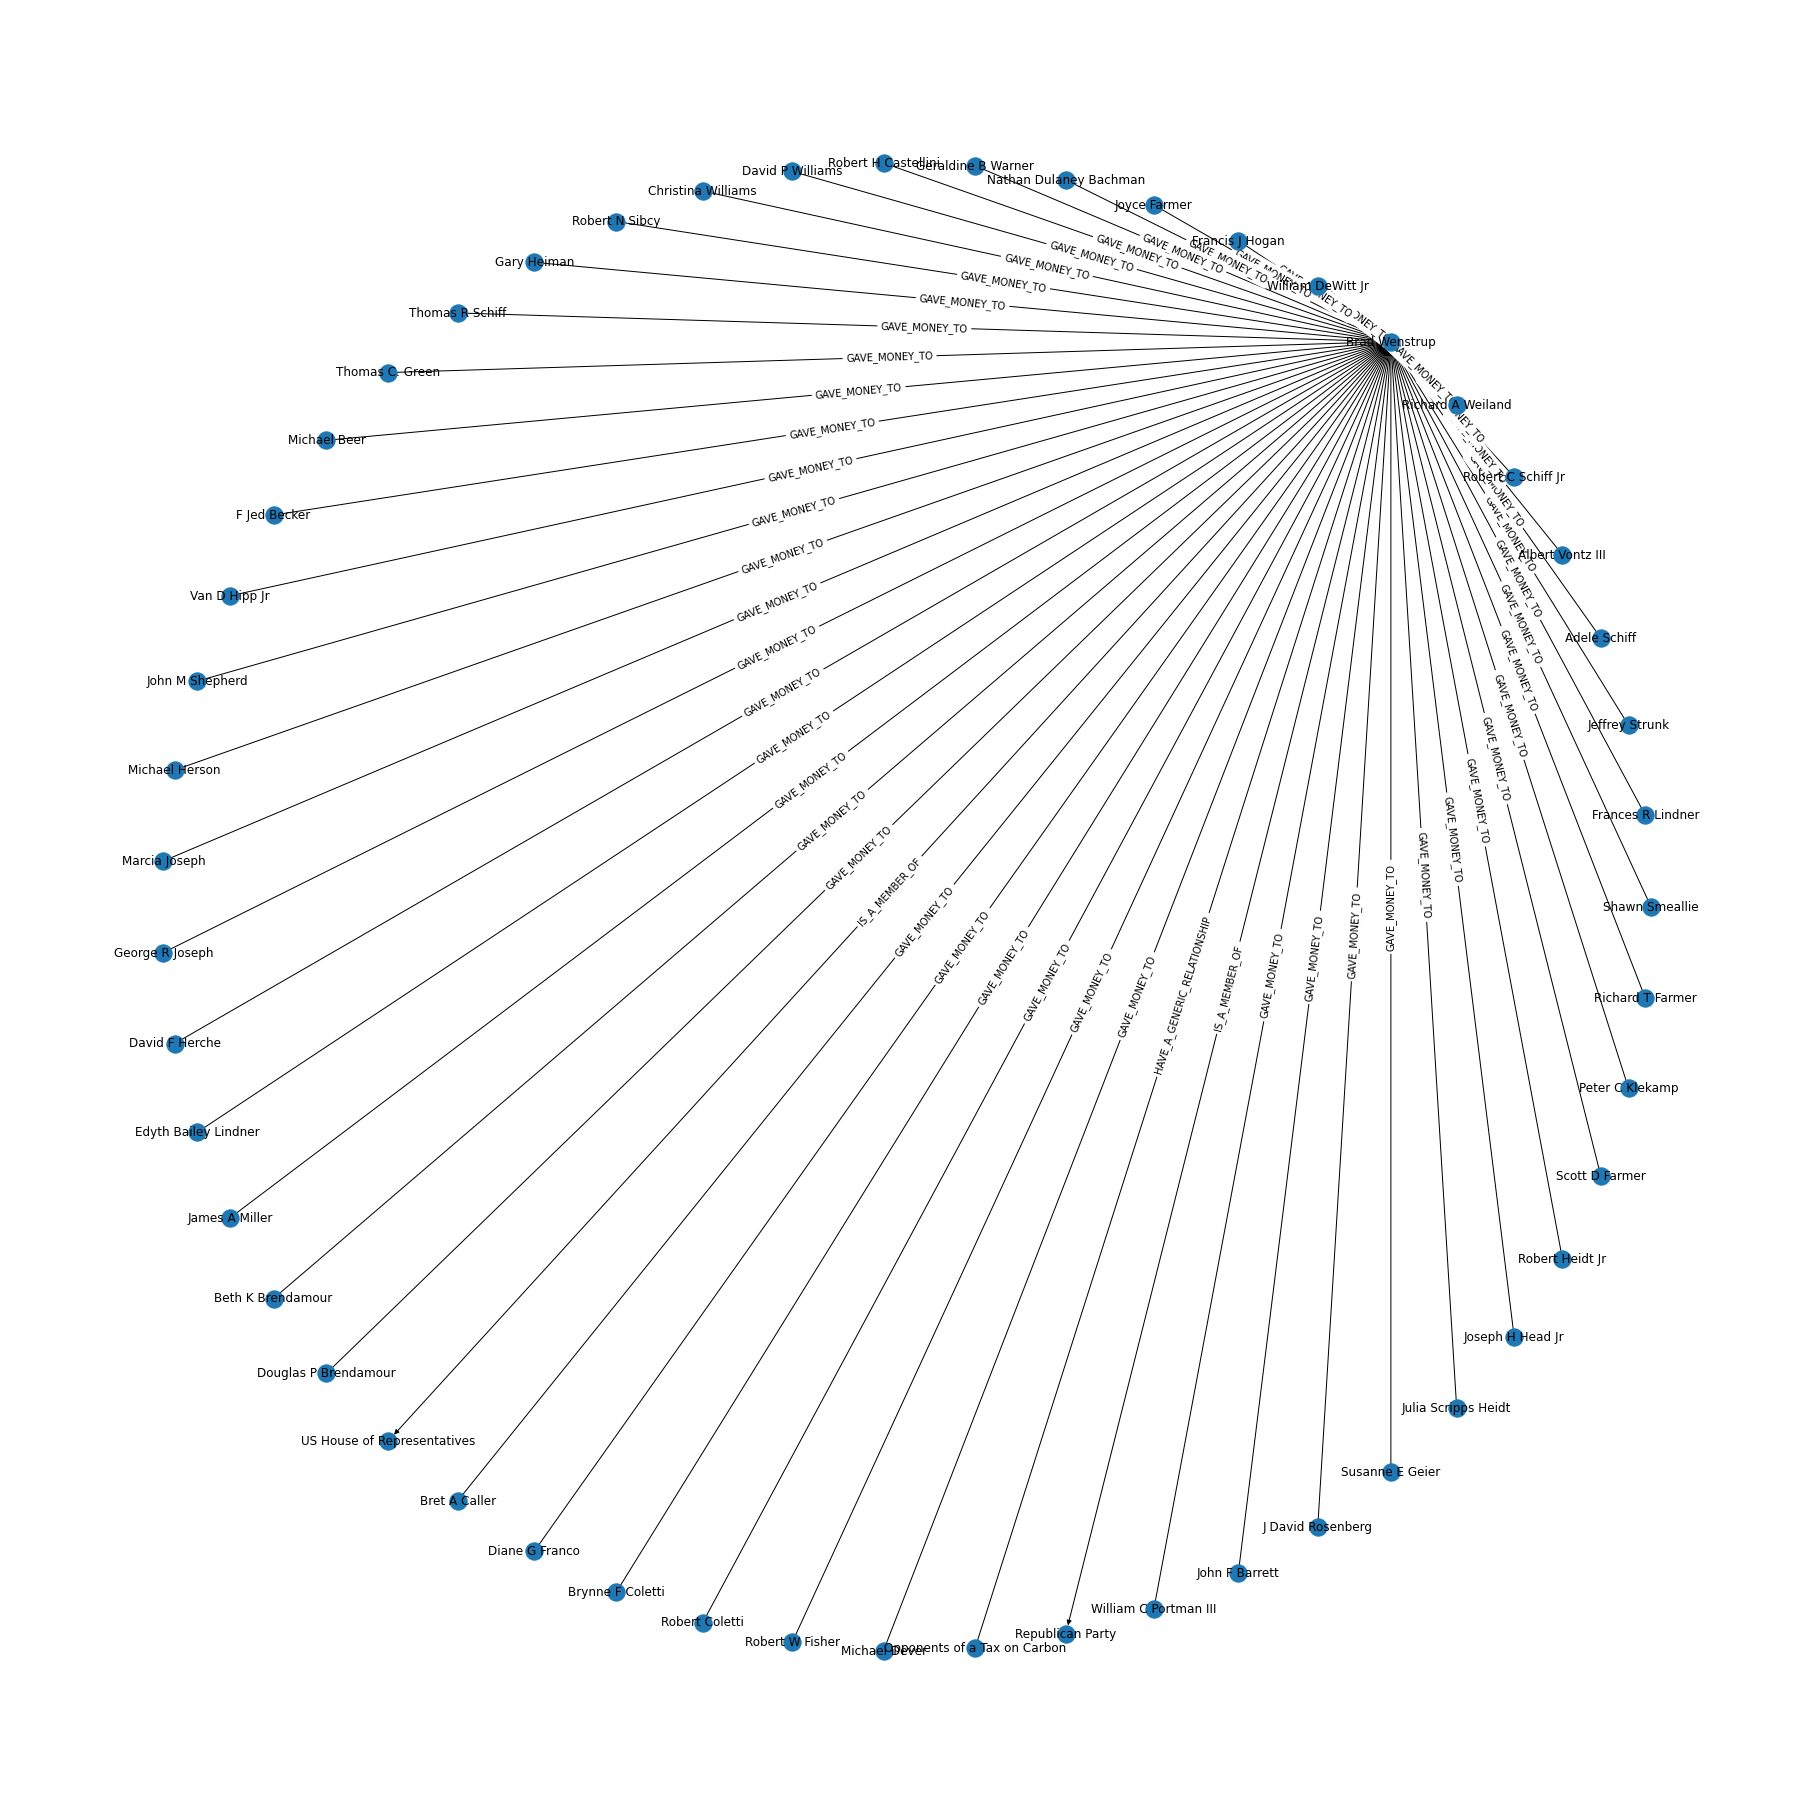

In [155]:

pos = nx.circular_layout(G)

plt.figure(3,figsize=(25,25)) 

nx.draw(G, pos)
node_names = nx.get_node_attributes(G,'name')
nx.draw_networkx_labels(G, pos, labels = node_names)

edge_labels = nx.get_edge_attributes(G,'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

plt.show()

In [160]:
#unique node labels

node_labels = nx.get_node_attributes(G, "label")

list(set(node_labels.values()))

['Org', 'Person']

In [159]:
# types of edge labels

list(set(edge_labels.values()))

['IS_A_MEMBER_OF', 'GAVE_MONEY_TO', 'HAVE_A_GENERIC_RELATIONSHIP']